<a href="https://colab.research.google.com/github/Kaber1a/ANALYSIS-AND-PREDICTION-OF-ESTIMATION-OF-CANCER-SURVIVAL/blob/main/CREDIT_SCORE_PREDICTION_BY_KEVIN_MUNYA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CREDIT SCORE EVALUATION BY KEVIN MUNYA**

**BUSINESS UNDERSTANDING**

1.Develop predictive regression models that can be used to forecast the credit score of an individual depending on factors such as annual income ,monthly inhandsalary, total emi per month, outstanding debt and credit utilization ratio.

2.Craft predictive classification models that can classify an individual by assigning them an accurate credit score leaning on factors around annual income ,monthly inhandsalary, total emi per month, outstanding debt and credit utilization ratio.

3.CLuster the data and generate insights about individuals lying within a certain credit score
   

In [ ]:
#loading the data set
import pandas as pd
df=pd.read_csv('/content/credit_score_cleaned_train.csv')
pd.set_option('display.max_columns', None)
df.head(3)


,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,3,4,3,4,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",3,7,11.27,4,Good,809.98,26.822620,265,No,80.415300,High_spent_Small_value_payments,312.49408,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,3,4,3,4,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",-1,7,11.27,4,Good,809.98,31.944960,266,No,118.280220,Low_spent_Large_value_payments,284.62915,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,3,4,3,4,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",3,7,11.27,4,Good,809.98,28.609352,267,No,81.699524,Low_spent_Medium_value_payments,331.20987,2


I have imported the necessary library to read the data set which was followed by loading the data set and finally reading the data set

In [ ]:
df.tail(3)

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,35.104023,4,6,7,2,"['Auto Loan', 'Student Loan']",27,6,11.5,3,Good,502.38,41.255524,380,No,24.028477,High_spent_Large_value_payments,516.80910,0
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,35.104023,4,6,7,2,"['Auto Loan', 'Student Loan']",20,6,11.5,3,Good,502.38,33.638206,381,No,251.672580,Low_spent_Large_value_payments,319.16498,1
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,35.104023,4,6,7,2,"['Auto Loan', 'Student Loan']",18,6,11.5,3,Good,502.38,34.192463,382,No,167.163860,Low_spent_Large_value_payments,393.67370,0


I have displayed the last 3 rows of the data set

**DATA UNDERSTANDING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      100000 non-null  object 
 4   age                       100000 non-null  int64  
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  float64
 8   monthly_inhand_salary     100000 non-null  float64
 9   total_emi_per_month       100000 non-null  float64
 10  num_bank_accounts         100000 non-null  int64  
 11  num_credit_card           100000 non-null  int64  
 12  interest_rate             100000 non-null  int64  
 13  num_of_loan               100000 non-null  in

I was checking on the size of the dataset, the data structure and finally the data types prresent in the data set

The data set has a size of 21.4 KB with a structure of 28 columns and 10,000 rows

In [ ]:
df.dtypes

,0
id,object
customer_id,object
month,object
name,object
age,int64
ssn,object
occupation,object
annual_income,float64
monthly_inhand_salary,float64
total_emi_per_month,float64


I went step by step to check the data type present in each column

In [ ]:
#Narrowing the data to columns fit for the analysis and prediction
selected_columns=[
    'annual_income',
    'monthly_inhand_salary',
    'total_emi_per_month',
    'changed_credit_limit',
    'outstanding_debt',
    'credit_utilization_ratio',
    'amount_invested_monthly',
    'monthly_balance',
    'credit_score'
]
sd_df=df[selected_columns]
sd_df.head(3)

,annual_income,monthly_inhand_salary,total_emi_per_month,changed_credit_limit,outstanding_debt,credit_utilization_ratio,amount_invested_monthly,monthly_balance,credit_score
0,19114.12,1824.8434,49.574947,11.27,809.98,26.822620,80.415300,312.49408,2
1,19114.12,1824.8434,49.574947,11.27,809.98,31.944960,118.280220,284.62915,2
2,19114.12,1824.8434,49.574947,11.27,809.98,28.609352,81.699524,331.20987,2


I selected few columns from the data set which I will place my focus on during the analysis and prediction

**DATA CLEANING**

In [ ]:
sd_df.dropna(inplace=True)
sd_df.isnull().sum()

<ipython-input-29-7022c3826897>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_df.dropna(inplace=True)


,0
annual_income,0
monthly_inhand_salary,0
total_emi_per_month,0
changed_credit_limit,0
outstanding_debt,0
credit_utilization_ratio,0
amount_invested_monthly,0
monthly_balance,0
credit_score,0


I dropped the missing values present in the data set if any existed the re-confirmed that all missing values had been dropped

In [ ]:
sd_df.duplicated().sum()

0

Checked for any duplicates within the data set

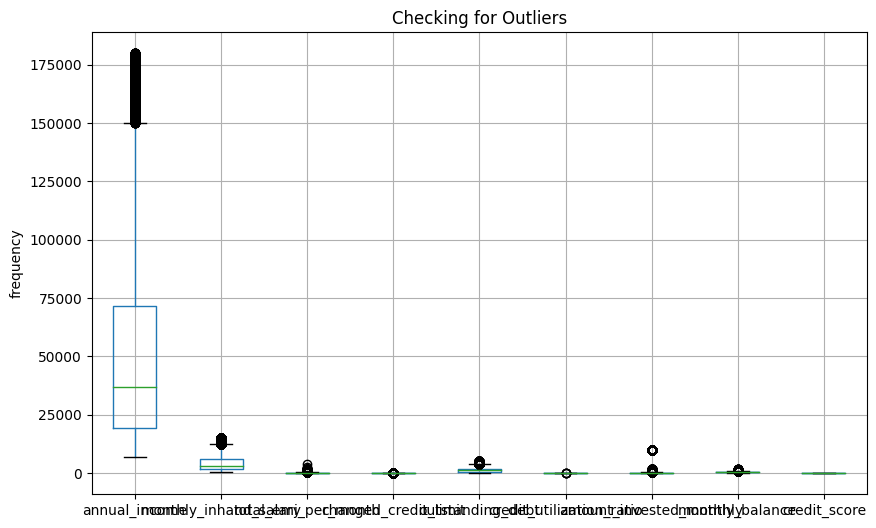

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sd_df.boxplot()
plt.title('Checking for Outliers')
plt.ylabel('frequency')
plt.show()

I was confirming if any outliers exists in the data set

**EXPLORATORY DATA ANALYSIS**

In [ ]:
sd_df.describe()

,annual_income,monthly_inhand_salary,total_emi_per_month,changed_credit_limit,outstanding_debt,credit_utilization_ratio,amount_invested_monthly,monthly_balance,credit_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,50505.123439,4198.771620,107.043617,10.389303,1426.220376,32.285173,637.633413,403.120320,0.88830
std,38299.422075,3187.494355,130.035096,6.789784,1155.129026,5.116875,2043.334171,214.014558,0.67512
min,7005.930000,303.645420,0.000000,-6.490000,0.230000,20.000000,0.000000,0.007760,0.00000
25%,19342.972500,1626.761700,29.197023,5.320000,566.072500,28.052567,74.593977,270.189028,0.00000
50%,36999.705000,3096.378400,66.403020,9.400000,1166.155000,32.305783,135.952230,337.114475,1.00000
75%,71683.470000,5961.745000,146.827450,14.860000,1945.962500,36.496664,266.178185,471.570645,1.00000
max,179987.280000,15204.634000,3776.000000,36.970000,4998.070000,50.000000,10000.000000,1602.040500,2.00000


I did a summary statistics for the entire data set

In [ ]:
correlation_matrix=sd_df.corr()
correlation_matrix

,annual_income,monthly_inhand_salary,total_emi_per_month,changed_credit_limit,outstanding_debt,credit_utilization_ratio,amount_invested_monthly,monthly_balance,credit_score
annual_income,1.000000,0.998201,0.447808,-0.175194,-0.269319,0.175930,0.060182,0.704362,0.212606
monthly_inhand_salary,0.998201,1.000000,0.431717,-0.175135,-0.269078,0.176081,0.060218,0.705571,0.209921
total_emi_per_month,0.447808,0.431717,1.000000,0.066577,0.111388,0.023080,0.028398,0.093485,0.016811
changed_credit_limit,-0.175194,-0.175135,0.066577,1.000000,0.458383,-0.047896,-0.011481,-0.205434,-0.169479
outstanding_debt,-0.269319,-0.269078,0.111388,0.458383,1.000000,-0.071165,-0.015888,-0.317648,-0.386525
credit_utilization_ratio,0.175930,0.176081,0.023080,-0.047896,-0.071165,1.000000,0.004004,0.246427,0.045793
amount_invested_monthly,0.060182,0.060218,0.028398,-0.011481,-0.015888,0.004004,1.000000,0.002629,0.012025
monthly_balance,0.704362,0.705571,0.093485,-0.205434,-0.317648,0.246427,0.002629,1.000000,0.208350
credit_score,0.212606,0.209921,0.016811,-0.169479,-0.386525,0.045793,0.012025,0.208350,1.000000


The correlation matrix highlights any relationships that exists among the columns in the data set. Positive values highlights that a co-relation exists while negative values highlights no correlation exists. The higher the value is close to 1, the higher the relationship between the columns.

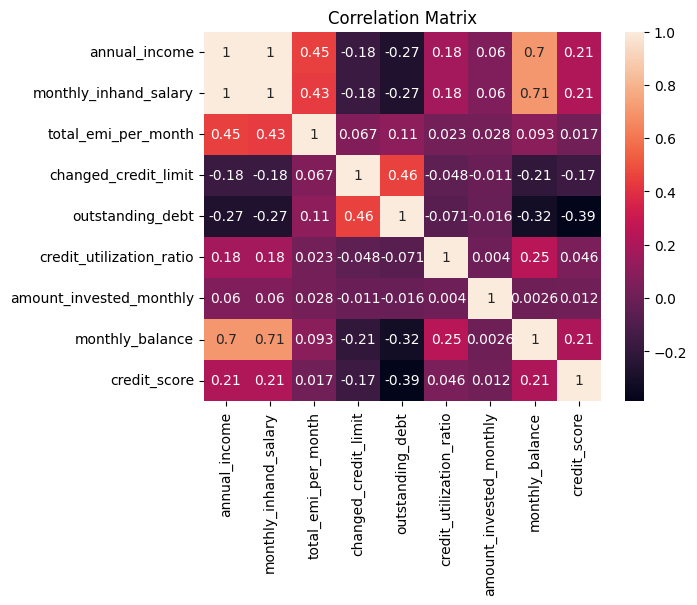

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix')
plt.show()

This is a visualization of the correlation matrix

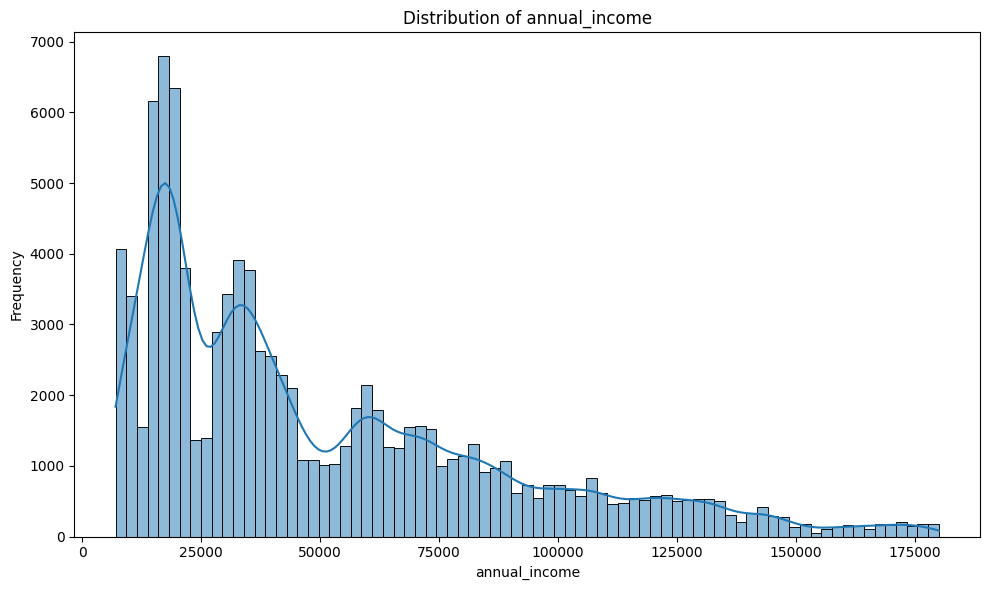

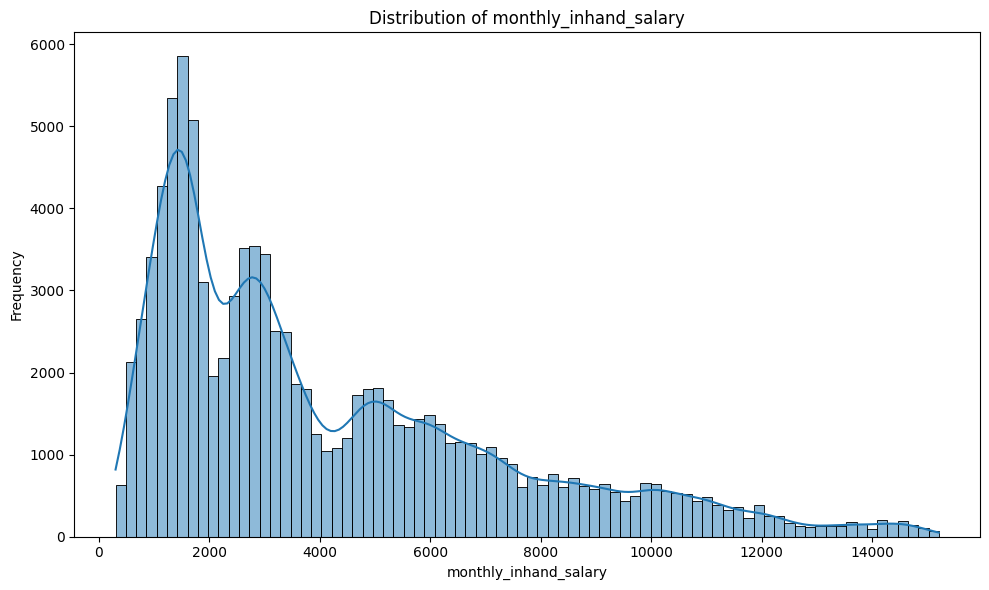

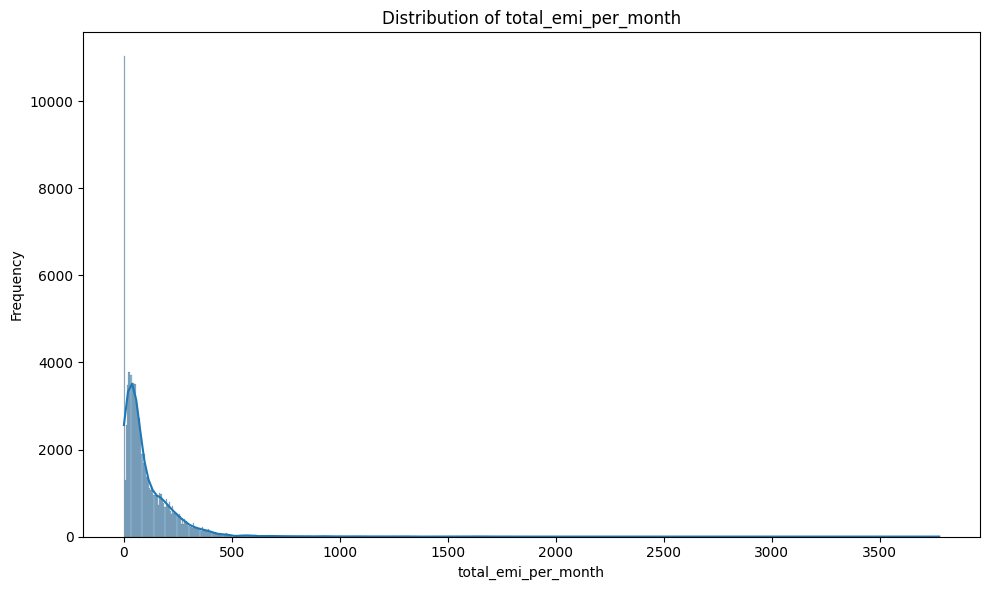

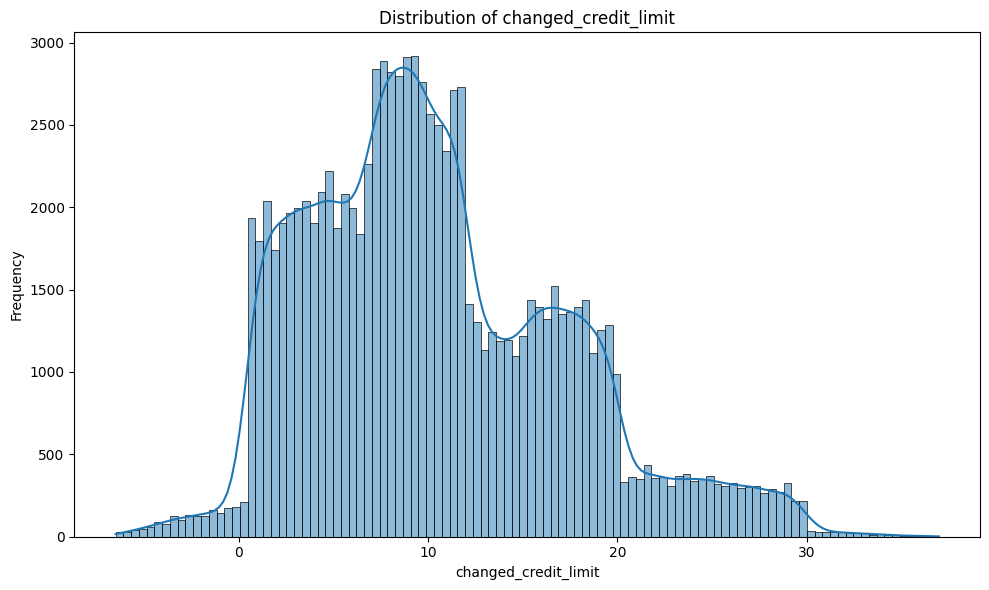

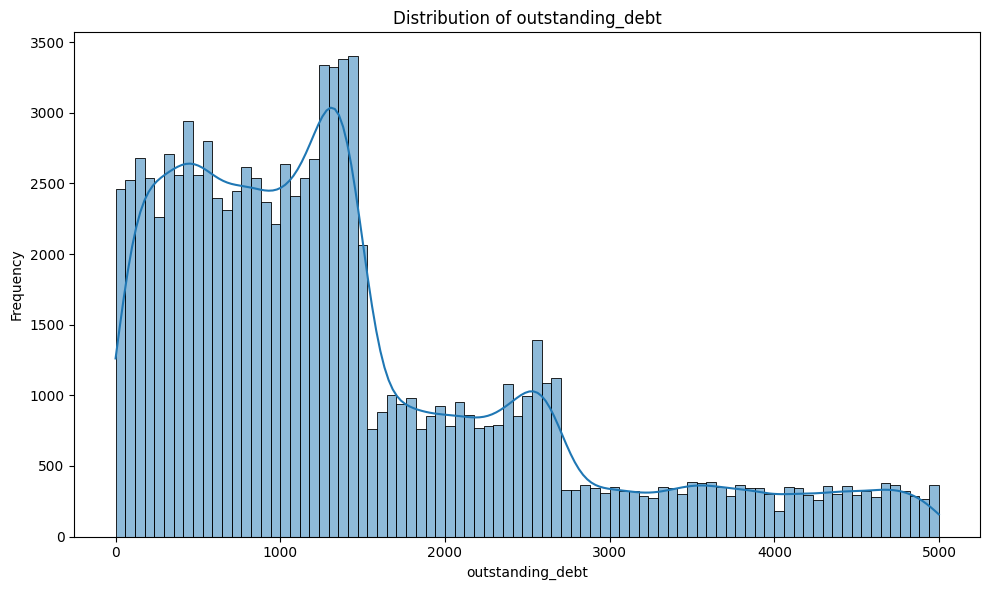

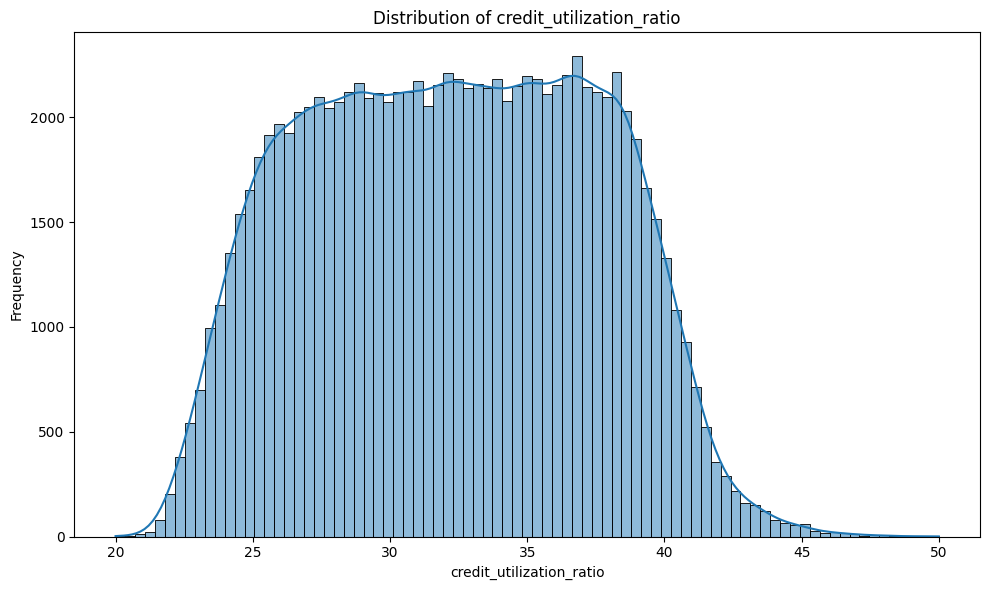

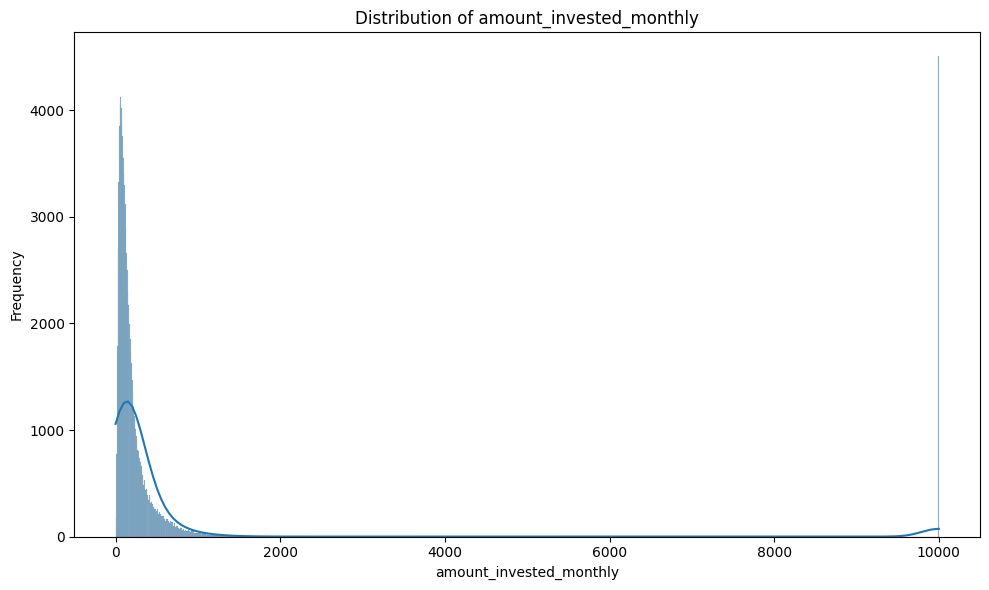

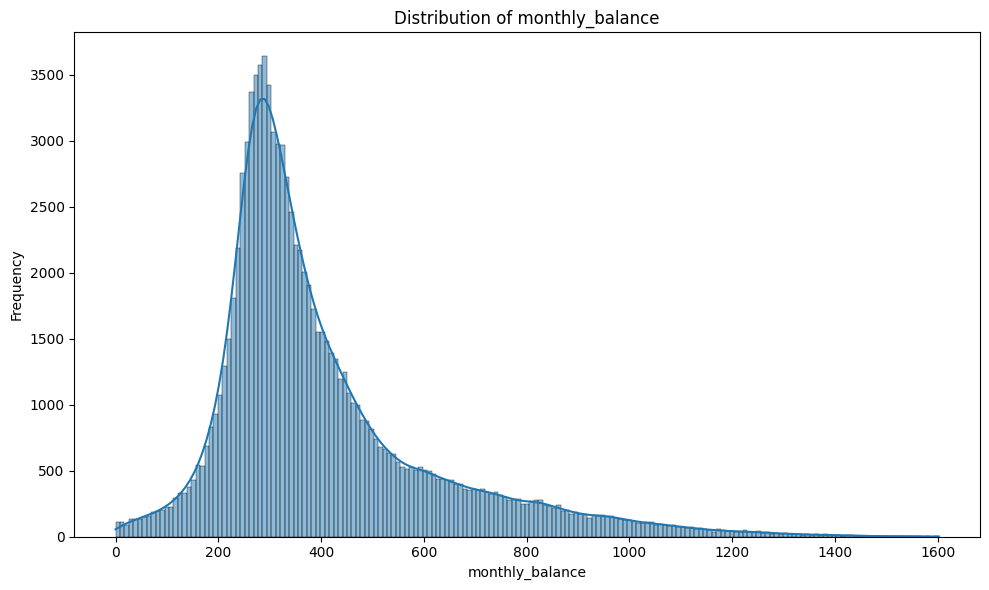

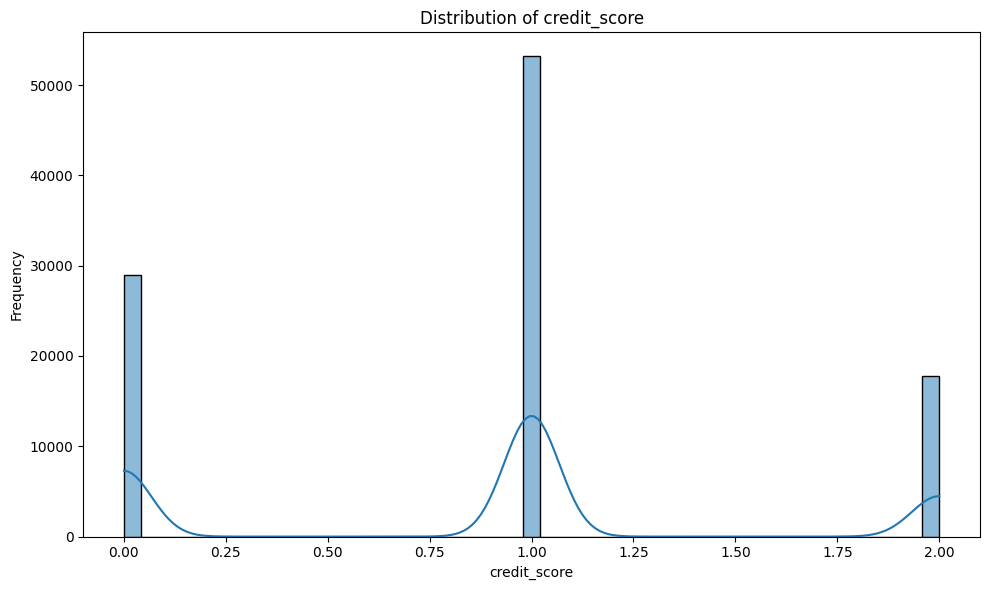

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in sd_df.columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(sd_df[col],kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()

I visualized the distribution of the selected columns using a histogram

**MODELLING**

**REGRESSION**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


X= sd_df.drop(columns=['credit_score'])
y=sd_df['credit_score']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



i imported the necessary libraries for splitting the data set into X and y variables.Then I seletected my X which I will use to predict my y

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)





I imported the neccesary libraries for the regression modelling. I assigned a name to the model. Fitted the model in the data set.Finally used the model to predict the outcome fo Y. I did this process using Linear Regression model and Decision Tree Regressor

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
models=['Linear Regression','Decision Tree']
predictions=[y_pred_lr,y_pred_dt]
results={}


for model,prediction in zip(models,predictions):
  mse=mean_squared_error(y_test,prediction)
  r2=r2_score(y_test,prediction)
  results[model]={'MSE':mse,'R2':r2}

import pandas as pd
pd.DataFrame(results)

,Linear Regression,Decision Tree
MSE,0.378731,0.330500
R2,0.169956,0.275662


I evaluated the performance of the 2 model to determine which model is better to predic such a data. Decision Tree turned out better compared to Linear regression because of the low Mean squared error highlighting that the difference between the actual value and predicted value using Decision Tree was minimal compared to Linear regression

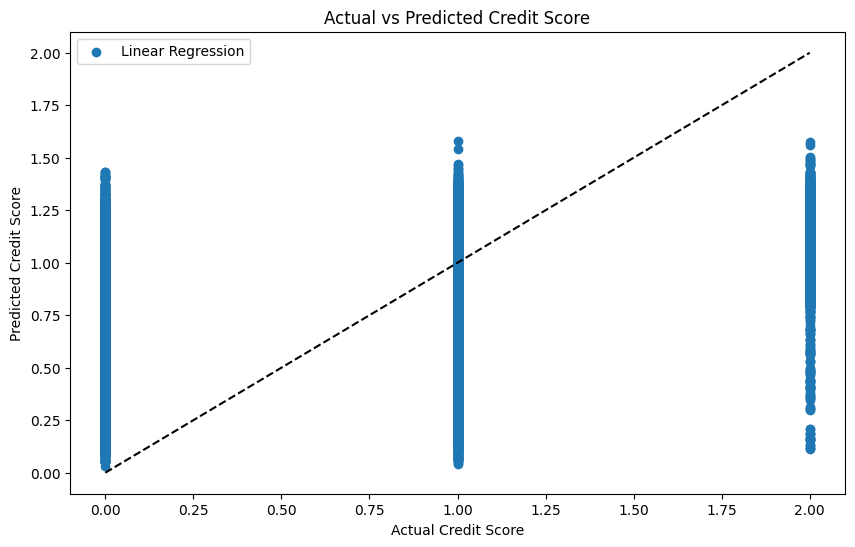

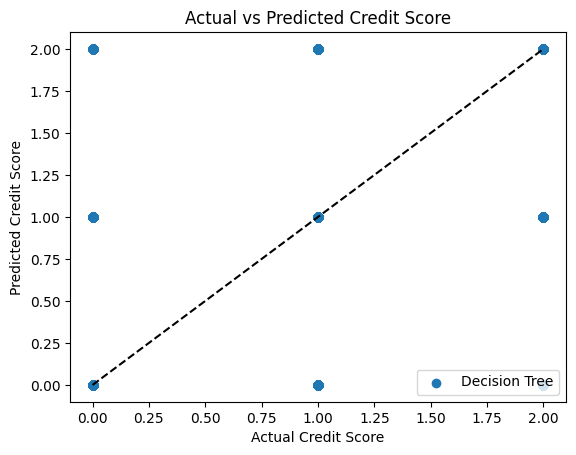

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
for model,prediction in zip(models,predictions):
  plt.scatter(x=y_test,y=prediction,label=model)
  plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],linestyle='--',color='black')
  plt.xlabel('Actual Credit Score')
  plt.ylabel('Predicted Credit Score')
  plt.title('Actual vs Predicted Credit Score')
  plt.legend()
  plt.show()


I visualized the regression resultsa of the 2 models comparing using the line of best fit difference between the actual score and predicted score depending on the deviation from the line of best fit

**CLASSIFICATION**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X= sd_df.drop(columns=['credit_score'])
y=sd_df['credit_score']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

classification_models=['Logistic Regression','Decision Tree']
predictions=[y_pred_lr,y_pred_dt]
classification_results={}

for model,prediction in zip(classification_models,predictions):
  report=classification_report(y_test,prediction,output_dict=True)
  accuracy=accuracy_score(y_test,prediction)
  classification_results[model]={
      'Precision':report['weighted avg']['precision'],
      'Recall':report['weighted avg']['recall'],
      'F1-Score':report['weighted avg']['f1-score'],
      'Accuracy':accuracy
  }


pd.DataFrame(classification_results)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Logistic Regression,Decision Tree
Precision,0.516082,0.699975
Recall,0.545150,0.700000
F1-Score,0.488360,0.699987
Accuracy,0.545150,0.700000


Imported the necessary libraries for classification. Selected my X and y to be used in the classification. Called, fitted and used my model to predict the classification. Finally I evaluated the performance of my models by analysing their accuracy, precision, recall and F1-score.

Decision tree turned out to be the best for classification because it had the highest precision, recall , F1score and Accuracy compared to Logistic regression

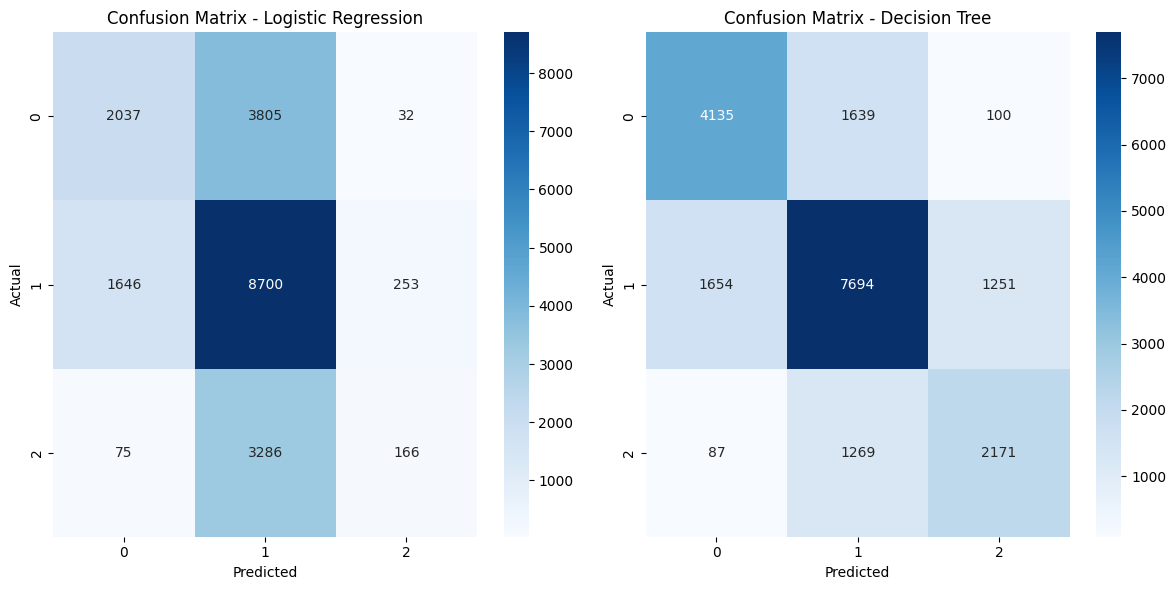

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y_test=le.fit_transform(y_test)
models=['Logistic Regression','Decision Tree']
predictions=[y_pred_lr,y_pred_dt]

fig,axes=plt.subplots(1,2,figsize=(12,6))
axes=axes.flatten()

for ax,model,prediction in zip(axes,models,predictions):
  cm=confusion_matrix(y_test,prediction)
  sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',ax=ax)
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')
  ax.set_title(f'Confusion Matrix - {model}')

plt.tight_layout()
plt.show  ()

I visualized the classification prediction by the 2 models

**CLUSTERING**

In [ ]:
!pip install scikit-learn-extra

I downloaded scikit-learn which I will use to import Kmediods clustering model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

clustering_results = {}



I imported all necessary libraries to be used during the clustering process. I also created an empty list where I will store my clustering results

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(sd_df)
clustering_results['K-Means'] = kmeans_labels

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(sd_df)
clustering_results['Gaussian Mixture'] = gmm_labels


I called the models that I will use for clustering, fitted the models into my data to preidict the clustering of the data

In [ ]:
metrics = {
    'clustering methods':[],
    'Silhouette Score':[]

}

for methods,labels in clustering_results.items():
  metrics['clustering methods'].append(methods)
  metrics['Silhouette Score'].append(silhouette_score(sd_df,labels))


pd.DataFrame(metrics)



,clustering methods,Silhouette Score
0,K-Means,0.633600
1,Gaussian Mixture,0.333042


I evaluated the performance of each model in modelling by using a silhouette score. K means happened to performance the best because of the hugher silhouetter score indicating that the data points are well clustereds

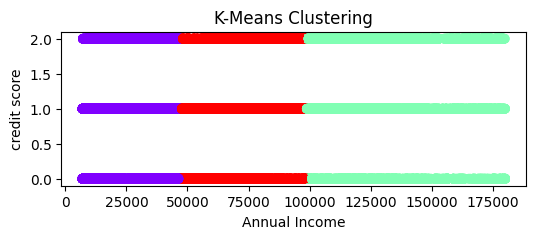

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,2))
plt.scatter(sd_df['annual_income'],sd_df['credit_score'],c=kmeans_labels,cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('credit score')
plt.title('K-Means Clustering')
plt.show()

I have visualized the effect of monthly balance on the credit score of an individual

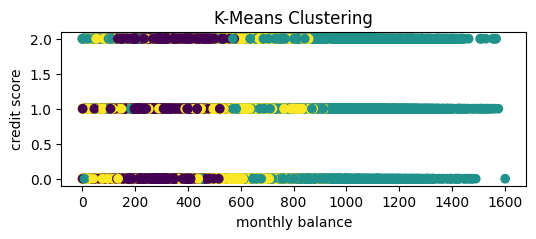

In [ ]:
plt.figure(figsize=(6,2))
plt.scatter(sd_df['monthly_balance'],sd_df['credit_score'],c=kmeans_labels)
plt.xlabel('monthly balance')
plt.ylabel('credit score')
plt.title('K-Means Clustering')
plt.show()

I have visualized the effect of monthly balance on the credit score of an individual

**CONCLUSIONS FROM THIS DATA SET**

1.The Annual income is not the perfect metrics to be used to classify an individual into a certain credit score. Thisis highly evident because both individuals of low, high and medium income are dispersed in almost equal amounts to all the credit score available\

2.Also an individual's monthly balance is not an ideal metric for classifying individuals into specific credit score category. This is backed by the fact that individuals with low, medium and high incomes are distributed in nearly equal proportions across all credit score ranges.